# Lecture 13의 데모

### Lecture 13의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec23.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Percentiles**

In [3]:
# Manually compute the 55th percentile
x = make_array(43, 20, 51, 7, 28, 34)

In [4]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [5]:
# Step 2. Figure out where 55th percentile would be.
np.arange(1,7)/len(x) * 100 #1부터 6까지

array([  16.66666667,   33.33333333,   50.        ,   66.66666667,
         83.33333333,  100.        ])

In [6]:
np.sort(x).item(3)

34

In [7]:
percentile(55,x) #55퍼센트에 해당 하는 것을 찾아라

34

In [ ]:
# Alternatively: One line of code


In [14]:
np.arange(1,6)/len(s) * 100

array([  20.,   40.,   60.,   80.,  100.])

In [15]:
# Discussion question
s = make_array(1, 5, 7, 3, 9)
np.sort(s)

array([1, 3, 5, 7, 9])

In [16]:
percentile(10,s)

1

In [17]:
percentile(39,s)

3

In [18]:
percentile(41,s)

5

In [19]:
s

array([1, 5, 7, 3, 9])

([<matplotlib.axis.YTick at 0x7fdc9deb2390>,
 <a list of 5 Text major ticklabel objects>)

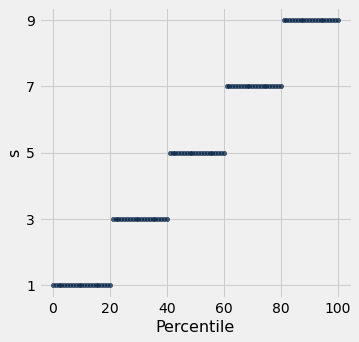

In [23]:
t=Table().with_column('Percentile',np.arange(0,101))
t=t.with_column('s',percentile(np.arange(0,101),s))
t.scatter('Percentile')
plots.xticks(np.floor(np.arange(0,len(s)+1)/len(s)*100))
plots.yticks(np.sort(s))

## **Total Compensation in Population**

In [24]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [25]:
# Who made the most money
sf.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [26]:
# Who made the least money
sf.sort('Total Compensation', descending=False).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [29]:
# $15/hr, 20 hr/wk, 50 weeks (시간당 15불 일주일에 50시간) 만 뽑아서 다시 구함.

min_salary = 15 * 20 * 50
sf = sf.where('Salary', are.above(min_salary))

In [30]:
sf.num_rows

37103

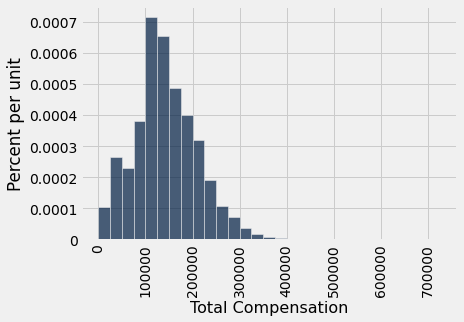

In [31]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [ ]:
percentile

## **Parameter: Median Total Compensation**

In [32]:
pop_median = percentile(50, sf.column('Total Compensation'))#중간값에 해당되는 median을 구하면 이럼.
pop_median#중간치

135747.0

## **Estimating the Parameter (Pretend it is Unknown)**

In [33]:
sample_size = 400
our_sample = sf.sample(sample_size, with_replacement=False)

In [34]:
our_sample.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Protection & Apprehension,Parking Control Officer,74955,19562,38192,132708
"Public Works, Transportation & Commerce",Department Of Public Works,Professional Engineering,Architect,154342,0,56220,210562
Public Protection,Police,Police Services,Police Officer 3,142613,11409,43859,197880
Community Health,Public Health,Nursing,Licensed Vocational Nurse,79149,52246,39173,170568
Community Health,Public Health,Nursing,Registered Nurse,17726,546,7362,25634


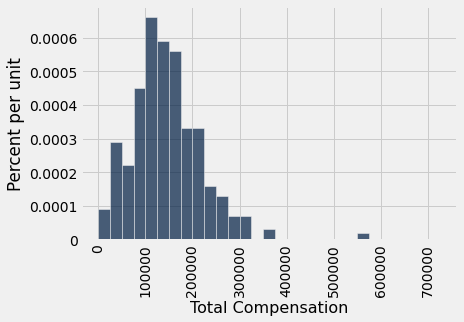

In [37]:
our_sample.hist('Total Compensation',bins=sf_bins)

In [41]:
percentile(50, our_sample.column('Total Compensation') ) #교수님껀 14~~로 나옴...

135633.0

But in the real world we won't be able to keep going back to the population. How to generate a new random sample *without going back to the population?*

# **Bootstrap**

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

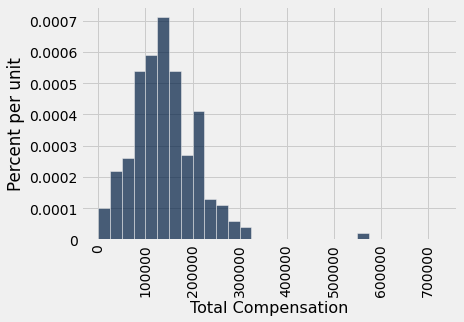

In [46]:
# Default behavior of tbl.sample:
# at random with replacement,
# the same number of times as rows of tbl

bootstrap_sample = our_sample.sample()
bootstrap_sample.hist('Total Compensation', bins=sf_bins) #아래 히스토그램 계속 달라짐

## **Bootstrap Sample Median**
This is one estimate of the population median.

In [47]:
percentile(50, bootstrap_sample.column('Total Compensation'))#그것의 median값을 구함.

135509.0

In [48]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = our_sample.sample()
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [51]:
one_bootstrap_median()#얘도 계속 바뀜(by sampling)

136513.0

In [53]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000. #반복을 1000번
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

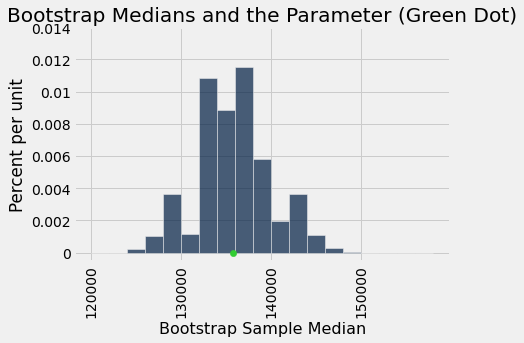

In [55]:
resampled_medians = Table().with_column( #배열로 테이블 만들기
    'Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000) # bin을 2000개
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');
# 초록점은 percentile(50, bootstrap_sample.column('Total Compensation'))#그것의 median값을 구함.-> 여기서 나온 값

In [56]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([ 128360.,  144402.])

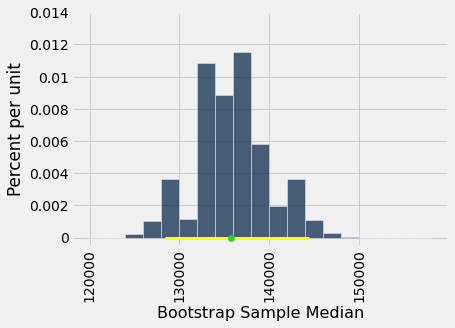

In [58]:
resampled_medians.hist(bins=median_bins)

# Plotting parameters; you can ignore his code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);
#노란색 구간 -> 95%의 구간

In [60]:
# Parameter: Median total compensation in the population
def median_comp(t):
    return percentile(50, t.column('Total Compensation'))

median_comp(sf)# sf가 population

135747.0

## **Bootstrap Estimates of the Parameter (Pretend it is Unknown)** 

patameter 를 bootstrap 기법으로 추정

In [64]:
def confidence_interval_95(sample_size):
  # Collect one random sample from the population
  sample_size = 100  # 샘플 100개 뽑기
  our_sample = sf.sample(sample_size, with_replacement=False)

  # Generate the medians of 1000 bootstrap samples
  num_repretitions = 1000
  bstrap_medians = make_array()
  for i in np.arange(num_repretitions): 
      # Resample the same number of rows, with replacement
      resample = our_sample.sample() 
      bstrap_medians = np.append(bstrap_medians,
                                median_comp(resample))

  # Find the middle 95% of medians; that's a confidence Interval
  left = percentile(2.5, bstrap_medians)
  right = percentile(97.5, bstrap_medians)

  return make_array(left, right)

In [65]:
confidence_interval_95(100)

array([ 120047.,  142385.])

## **Confidence Interval for Unknown Population Mean**

In [66]:
intervals = Table(['k', 'lower', 'upper', 'sample_size'])

for n in [100, 400]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_95(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n 
        ])

intervals.show(4)

k,lower,upper,sample_size
0,118468,139506,100
1,123723,160309,100
2,116111,139947,100
3,124633,143826,100


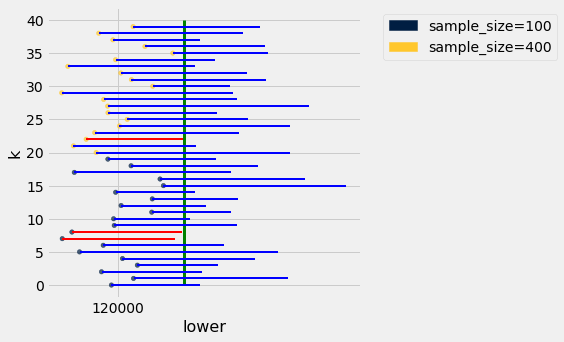

In [71]:
intervals.scatter('lower', 'k', group='sample_size')
truth = percentile(50, sf.column('Total Compensation'))
plots.plot((truth, truth), (0, intervals.num_rows), color='green', lw=3)
plots.xticks([120000, 1500000])
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'blue'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('k'), row.item('k')),
               color, lw=2)

In [72]:
intervals = Table(['k', 'lower', 'upper', 'sample_size'])

for n in [2, 4, 8, 16]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_95(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n
        ])

intervals.show(4)

k,lower,upper,sample_size
0,137911,156471,2
1,112381,144138,2
2,141794,164790,2
3,126691,155428,2


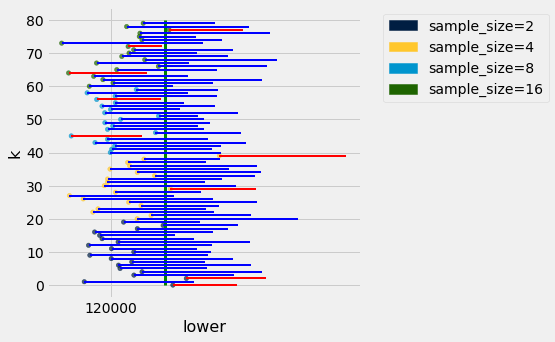

In [73]:
intervals.scatter('lower', 'k', group='sample_size')
truth = percentile(50, sf.column('Total Compensation'))
plots.plot((truth, truth), (0, intervals.num_rows), color='green', lw=3)
plots.xticks([120000, 1500000])
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'blue'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('k'), row.item('k')),
               color, lw=2)

--> Lecture Note로 돌아감

## **Confidence Interval for Unknown Population Mean**

In [74]:
# Random sample of mother-newborn pairs
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


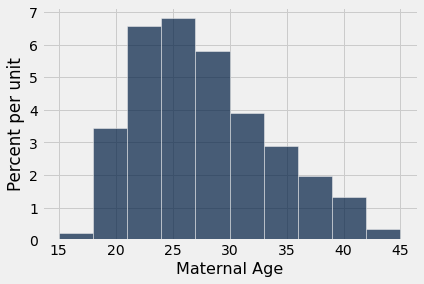

In [75]:
births.hist('Maternal Age')

In [76]:
# Average age of mothers in the sample
np.average(births.column('Maternal Age'))

27.228279386712096

### Question
What is the average age of the mothers in the population?

In [77]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [78]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

### Bootstrap Percentile Method for Confidence Interval

The interval of estimates is the "middle 95%" of the bootstrap estimates.

This is called a *95% confidence interval* for the mean age in the population.

In [79]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 26.88330494,  27.56388416])

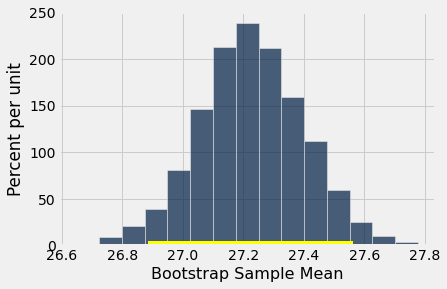

In [80]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);# 노란색이 95% 구간

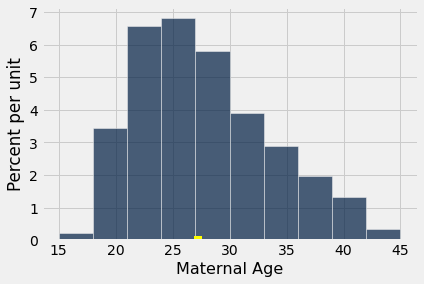

In [81]:
births.hist('Maternal Age')
plots.plot([left, right], [0, 0], color='yellow', lw=8);